In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split

In [2]:
iris=sns.load_dataset('iris')
data=torch.tensor(iris[iris.columns[0:4]].values).float()
labels=torch.zeros(len(data),dtype=torch.long)
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2



In [3]:
propTraining=0.8
nTraining=int(len(labels)*propTraining)

traintestBool=np.zeros(len(labels),dtype=bool)
items2use4train=np.random.choice(range(len(labels)),nTraining,replace=False)
traintestBool[items2use4train]=True
traintestBool

array([ True,  True,  True,  True, False, False,  True,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [4]:
print('average of full data: ')
print(torch.mean(labels.float()))

print('average of train data: ')
print(torch.mean(labels[traintestBool].float()))

print('average of test data: ')
print(torch.mean(labels[~traintestBool].float()))
  

average of full data: 
tensor(1.)
average of train data: 
tensor(1.0417)
average of test data: 
tensor(0.8333)


In [5]:
ANNiris=nn.Sequential(nn.Linear(4,64),
                     nn.ReLU(),
                     nn.Linear(64,64),
                     nn.ReLU(),
                     nn.Linear(64,3),)
lossfun=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(ANNiris.parameters(),lr=0.01)

In [6]:
print(data.shape)
print(data[traintestBool,:].shape)
print(data[~traintestBool,:].shape)


torch.Size([150, 4])
torch.Size([120, 4])
torch.Size([30, 4])


In [7]:
numepoches=1000
losses=torch.zeros(numepoches)
ongoingAcc=[]
for epochi in range(numepoches):
    yHat=ANNiris(data[traintestBool,:])
    ongoingAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==labels[traintestBool]).float()))
    loss=lossfun(yHat,labels[traintestBool])
    losses[epochi]=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
predictionTrain=ANNiris(data[traintestBool,:])
trainAcc=100*torch.mean((torch.argmax(predictionTrain,axis=1)==labels[traintestBool]).float())

predictionTest=ANNiris(data[~traintestBool,:])
testAcc=100*torch.mean((torch.argmax(predictionTest,axis=1)==labels[~traintestBool]).float())



In [8]:
print(f'the final train acc: {trainAcc}')
print(f'the final test acc: {testAcc}')


the final train acc: 97.5
the final test acc: 100.0


In [9]:
def createANNmodel():
    ANNiris=nn.Sequential(nn.Linear(4,64),
                         nn.ReLU(),
                         nn.Linear(64,64),
                         nn.ReLU(),
                         nn.Linear(64,3),)
    lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(ANNiris.parameters(),lr=0.01)
    return ANNiris,lossfun,optimizer

In [10]:

numepoches=200
def trainTheModel(trainProp):
    losses=torch.zeros(numepoches)
    trainAcc=[]
    testAcc=[]
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp, random_state=42)
        
    for epochi in range(numepoches):
        
        yHat=ANNiris(X_train )
        
        loss=lossfun(yHat,y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()).item())

    
        testAcc.append(100*torch.mean((torch.argmax(ANNiris(X_test),axis=1)==y_test).float()).item())
    return trainAcc,testAcc


In [11]:
ANNiris,lossfun,optimizer=createANNmodel()
trainAcc,testAcc=trainTheModel(0.8)

Text(0, 0.5, 'accuracy')

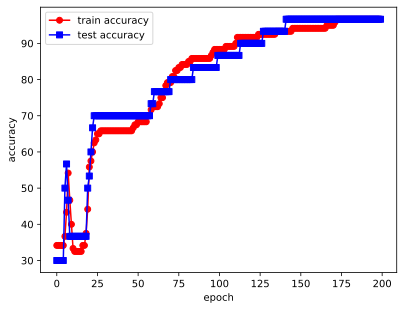

In [12]:
plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.legend(['train accuracy','test accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [13]:
trainSetSizes=np.linspace(0.2,0.95,10)
allTrainAcc=np.zeros((len(trainSetSizes),numepoches))
allTestAcc=np.zeros((len(trainSetSizes),numepoches))
for i in range(len(trainSetSizes)):
    ANNiris,lossfun,optimizer=createANNmodel()
    trainAcc,testAcc=trainTheModel(trainSetSizes[i])
    allTrainAcc[i,:]=trainAcc
    allTestAcc[i,:]=testAcc
    

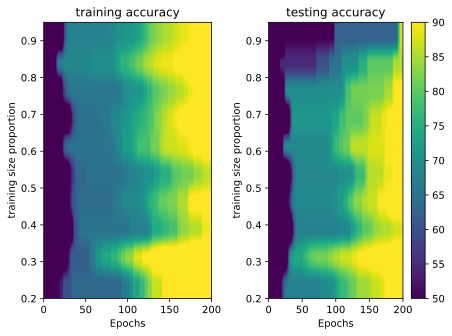

In [14]:
fig,ax=plt.subplots(1,2)
ax[0].imshow(allTrainAcc,aspect='auto',vmin=50,vmax=90,
             extent=[0,numepoches,trainSetSizes[0],trainSetSizes[-1]],origin='lower')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('training size proportion')
ax[0].set_title('training accuracy')
p=ax[1].imshow(allTestAcc,aspect='auto',vmin=50,vmax=90,
             extent=[0,numepoches,trainSetSizes[0],trainSetSizes[-1]],origin='lower')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('training size proportion')
ax[1].set_title('testing accuracy')
fig.colorbar(p,ax=ax[1])
plt.tight_layout()
plt.show()